In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import os

# Path ke folder Google Drive yang berisi gambar
drive_folder_path = '/content/drive/MyDrive/Skripsheet/Dataset CNN'

# Fungsi untuk meresize gambar
def resize_image(image_path, new_width, new_height):
    img = Image.open(image_path)
    resized_img = img.resize((new_width, new_height))
    return resized_img

# Meresize semua gambar dalam folder
def resize_images_in_folder(folder_path, new_width, new_height):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, filename)
            resized_img = resize_image(image_path, new_width, new_height)
            resized_img.save(image_path)

# Meresize gambar dalam folder Google Drive
new_width, new_height = 300, 300  # Ganti sesuai kebutuhan Anda
resize_images_in_folder(drive_folder_path, new_width, new_height)

In [ ]:
# Path dataset
train_path = '/content/drive/MyDrive/Skripsheet/Dataset CNN/Training'
val_path = '/content/drive/MyDrive/Skripsheet/Dataset CNN/Validation'

In [ ]:
# Membuat objek ImageDataGenerator untuk augmentasi data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
# Membuat objek ImageDataGenerator tanpa augmentasi untuk data validation
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Menggunakan objek ImageDataGenerator untuk memuat data dari direktori
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 808 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
# Set up data generators for training and validation
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=20,
#                                    brightness_range=(0.8,1.2),
#                                    horizontal_flip=True)

# val_datagen = ImageDataGenerator(rescale=1./255,
#                                  rotation_range=20,
#                                  brightness_range=(0.8,1.2),
#                                  horizontal_flip=True)

# train_generator = train_datagen.flow_from_directory(train_path,
#                                                     target_size=(100, 100),
#                                                     batch_size=16,
#                                                     class_mode='categorical')

# val_generator = val_datagen.flow_from_directory(val_path,
#                                                 target_size=(100, 100),
#                                                 batch_size=16,
#                                                 class_mode='categorical')

In [ ]:
#Membuat model CNN yang lebih kompleks
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Menambahkan layer dropout untuk mengurangi overfitting
    Dense(256, activation='relu'),
    Dropout(0.3),  # Menambahkan layer dropout untuk mengurangi overfitting
    Dense(2, activation='softmax')
])

In [ ]:
# model = Sequential([
#     # Convolutional layers
#     Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(100, 100, 3)),
#     Conv2D(32, (3, 3), padding='same', activation='relu'),
#     MaxPooling2D((2, 2)),

#     Conv2D(64, (3, 3), padding='same', activation='relu'),
#     Conv2D(64, (3, 3), padding='same', activation='relu'),
#     MaxPooling2D((2, 2)),

#     Conv2D(128, (3, 3), padding='same', activation='relu'),
#     Conv2D(128, (3, 3), padding='same', activation='relu'),
#     MaxPooling2D((2, 2)),

#     # Fully connected layers
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(2, activation='softmax')  # 2 classes: Jalan berlubang dan Jalan retak
# ])

In [ ]:
# # Kompilasi model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Set up checkpoint callback
checkpoint = ModelCheckpoint("CNN_Model1.h5",
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

In [ ]:
# Menyimpan sejarah pelatihan untuk plotting
# history = model.fit(
#     train_generator,
#     steps_per_epoch=len(train_generator),
#     epochs=40,  # Sesuaikan dengan jumlah epoch yang diinginkan
#     validation_data=val_generator,
#     validation_steps=len(val_generator)
# )

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[checkpoint]
    )

# history = model.fit(
#     train_generator,
#     epochs=30,
#     validation_data=val_generator,
#     callbacks=[checkpoint],
#     steps_per_epoch=50,  # Menyesuaikan jumlah iterasi untuk mencakup seluruh dataset dalam 50 iterasi
# )

Epoch 1/30
26/26 [==============================] - ETA: 0s - loss: 0.6871 - accuracy: 0.5334
Epoch 1: val_accuracy improved from -inf to 0.48000, saving model to CNN_Model1.h5
26/26 [==============================] - 221s 8s/step - loss: 0.6871 - accuracy: 0.5334 - val_loss: 0.6987 - val_accuracy: 0.4800
Epoch 2/30
26/26 [==============================] - ETA: 0s - loss: 0.6775 - accuracy: 0.5730
Epoch 2: val_accuracy did not improve from 0.48000
26/26 [==============================] - 110s 4s/step - loss: 0.6775 - accuracy: 0.5730 - val_loss: 0.7675 - val_accuracy: 0.4150
Epoch 3/30
26/26 [==============================] - ETA: 0s - loss: 0.5886 - accuracy: 0.7302
Epoch 3: val_accuracy improved from 0.48000 to 0.55000, saving model to CNN_Model1.h5
26/26 [==============================] - 106s 4s/step - loss: 0.5886 - accuracy: 0.7302 - val_loss: 1.2584 - val_accuracy: 0.5500
Epoch 4/30
26/26 [==============================] - ETA: 0s - loss: 0.4838 - accuracy: 0.7710
Epoch 4: val_a

In [ ]:
# from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(patience=50)

# history = model.fit(
#     train_generator,
#     epochs=30,
#     validation_data=val_generator,
#     callbacks=[checkpoint, early_stopping],  # Menambahkan callback EarlyStopping
# )


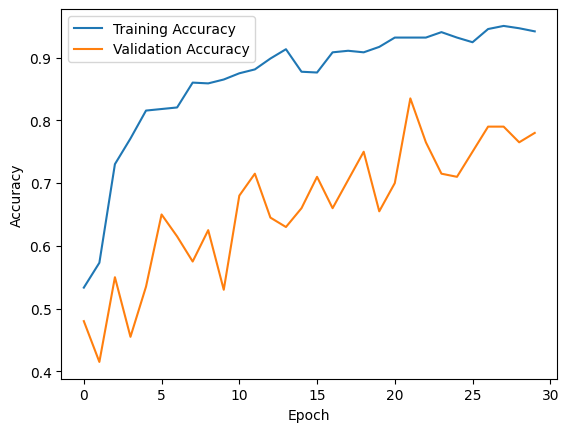

In [ ]:
# Plot akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

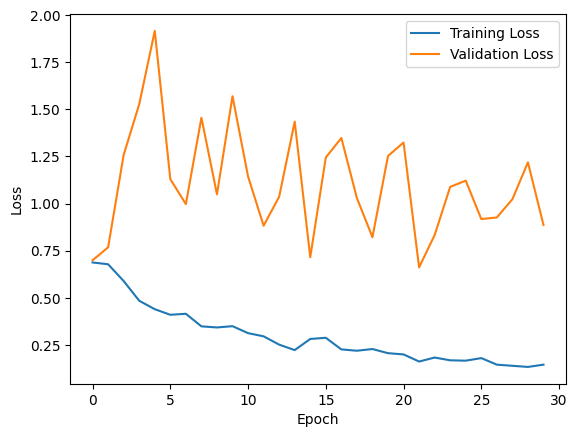

In [ ]:
# Plot loss pelatihan dan validasi
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluasi model pada data validasi
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')

7/7 [==============================] - 8s 1s/step - loss: 0.8860 - accuracy: 0.7800
Validation Accuracy: 78.00%


In [ ]:
# Mengecek apakah akurasi di atas 73%
if val_acc > 0.75:
    print("Model memiliki akurasi di atas 75%.")
else:
    print("Perlu peningkatan pada model untuk mencapai akurasi di atas 75%.")

Model memiliki akurasi di atas 75%.


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np


1/1 [==============================] - 0s 52ms/step


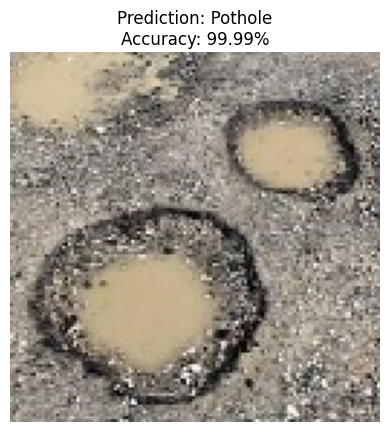

In [ ]:
# Path gambar yang diunggah
uploaded_image_path = '/content/Testing (6).jpg'

# Muat dan preproses gambar
img = image.load_img(uploaded_image_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Lakukan prediksi menggunakan model
prediction = model.predict(img_array)

# Konversi hasil prediksi menjadi label
labels = ['Pothole', 'Crack']
predicted_label = labels[np.argmax(prediction)]

# Tampilkan gambar dan hasil prediksi
plt.imshow(img)
plt.title(f'Prediction: {predicted_label}\nAccuracy: {np.max(prediction)*100:.2f}%')
plt.axis('off')
plt.show()